In [3]:
    %cd ..

/Users/tantri/Documents/My Research Material/UTSSpring23/AdvancedML/AT1/Backup/1Sept/AT1-NBAComp


In [ ]:
#All the data processing steps have been documented in the data_preprocessing.ipynb notebook in the notebook folder. 

In [ ]:
#First step will be to import the data from a remote storage where the training and test files are hosted. 

In [32]:
!make data

python3 test_environment.py
>>> Development environment passes all tests!
python3 -m pip install -U pip setuptools wheel
python3 -m pip install -r requirements.txt
Ignoring colorama: markers 'python_version >= "3.10" and python_version < "4.0" and sys_platform == "win32"' don't match your environment
Ignoring pywin32: markers 'sys_platform == "win32" and platform_python_implementation != "PyPy" and python_version >= "3.10" and python_version < "4.0"' don't match your environment
Ignoring pywinpty: markers 'python_version >= "3.10" and python_version < "4.0" and os_name == "nt"' don't match your environment
>>> Downloading train data from Kaggle.
curl -o data/raw/train.csv https://raw.githubusercontent.com/kirandas-dev/data-ML/main/train.csv
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 20.1M  100 20.1M    0     0  19.4M      0  0:00:01  0:00:01 --:--:-- 19.4M
>>> Download

In [29]:
# We will frequency distribution of categories since we are considering this feature for modelling. 
# Below we will also see the Skewness/Kurtosis of few more features that will help us in the feature engineering process. 

python3 src/visualization/visualize.py


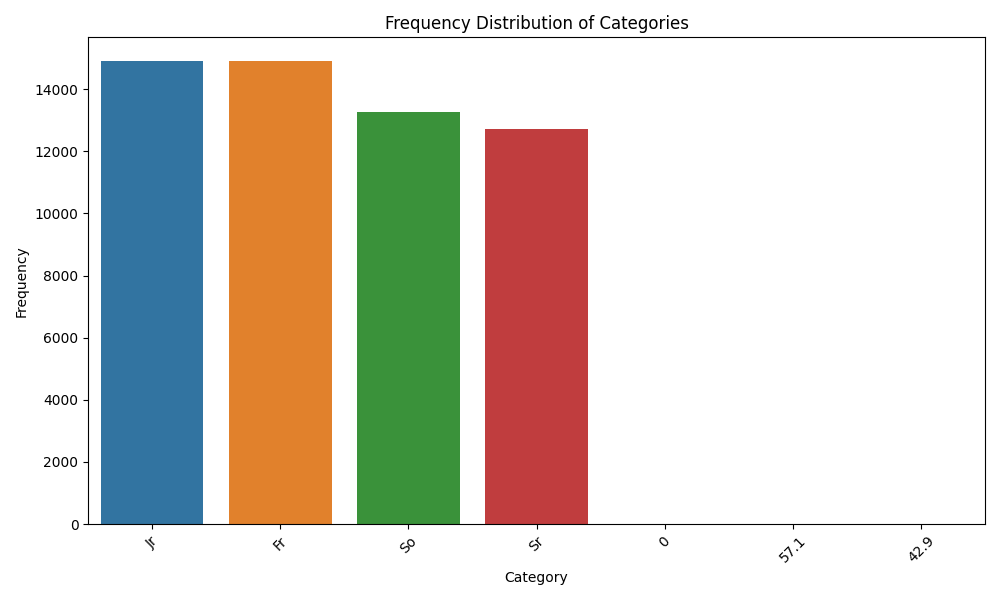

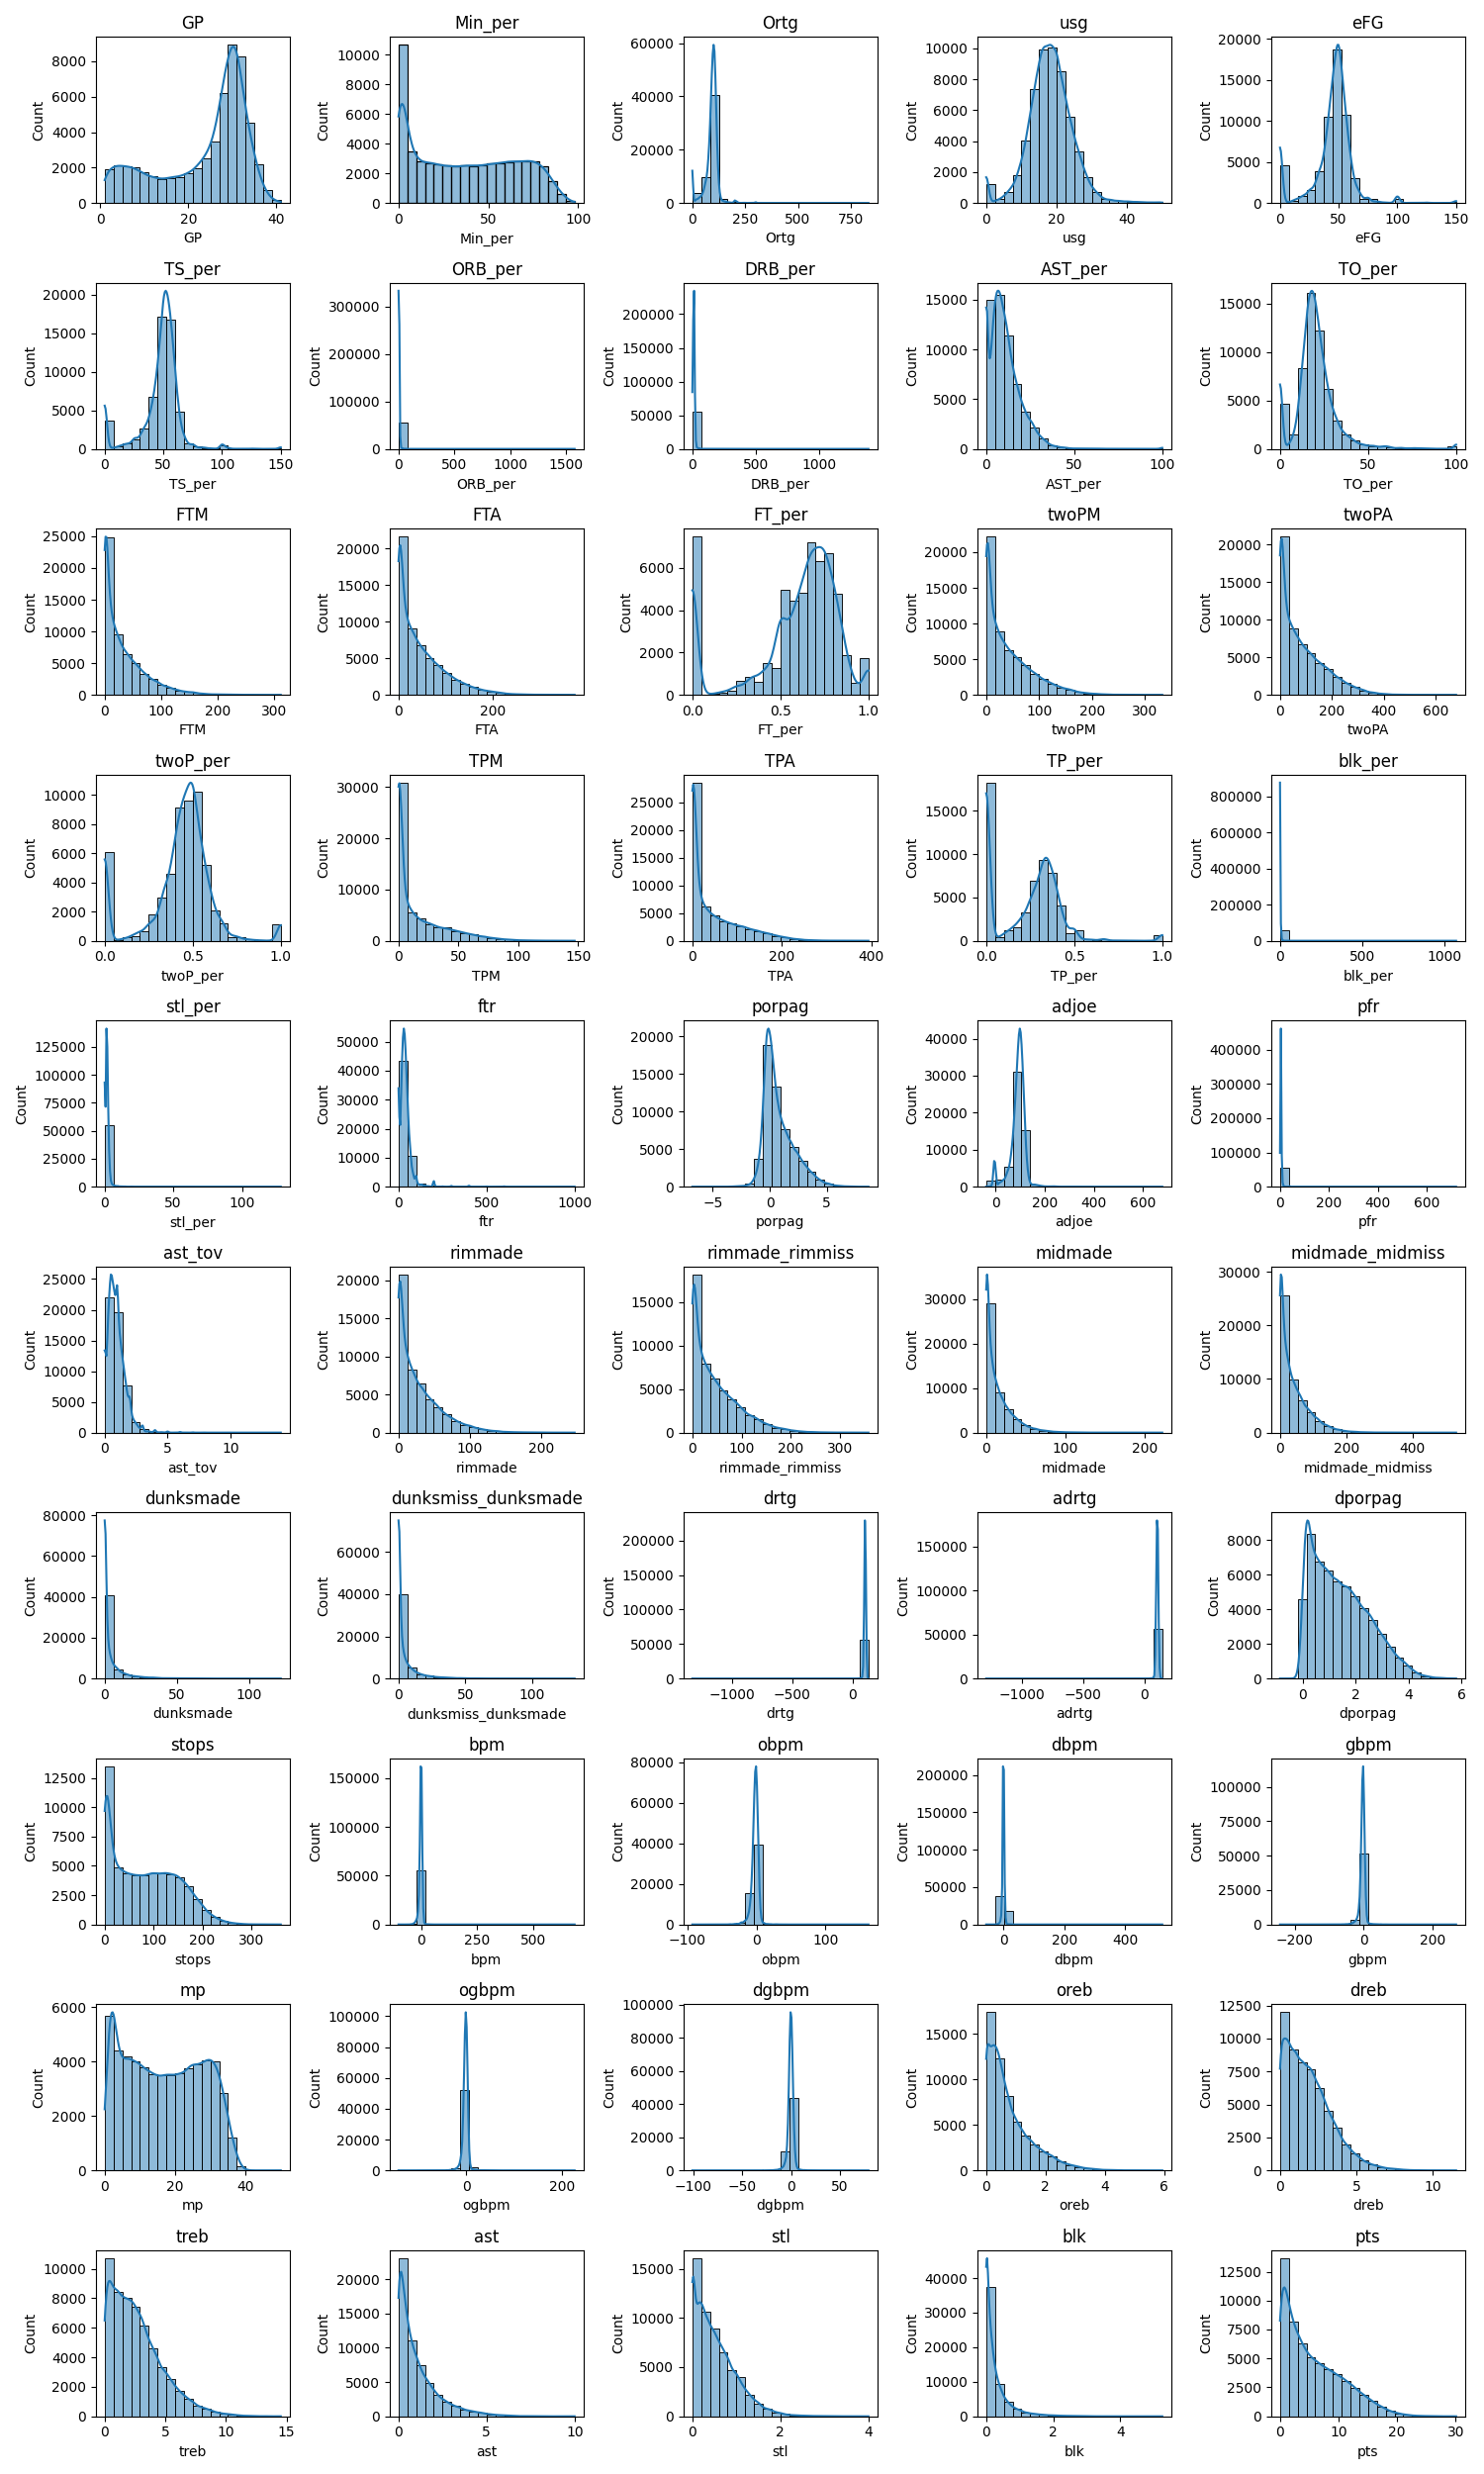

In [33]:
!make visualise_data

from IPython.display import Image
image_path = 'reports/figures/FD_categories.png'

# Display the Frequency Distribution
display(Image(filename=image_path))

image_path_1='reports/figures/kurtosis.png'

# Display the Descriptive Statistics of the shortlisted features
display(Image(filename=image_path_1))




In [34]:
# Now we will preprocess our data for modelling. 

In [36]:
!make process_data

python3 src/data/make_dataset.py data/raw/train.csv data/processed
2023-09-08 12:19:33,022 - __main__ - INFO - making final data set from raw data
2023-09-08 12:19:33,022 - __main__ - INFO - reading data
2023-09-08 12:19:33,231 - __main__ - INFO - processing data
2023-09-08 12:19:33,685 - __main__ - INFO - saving processed data


In [ ]:
#Train XGBoost Model with the best parameters obtained from grid search
#best_params = {'learning_rate': 0.0145, 'max_depth': 2, 'n_estimators': 400, 'reg_lambda': 0.5}


In [37]:
!make train_model 

>>> Training the model.
python3 src/models/train_model.py
Train Accuracy: 0.9933825515440713
Train F1 Score: 0.9934215433268195
Validation Accuracy: 0.9932067662407774
Validation F1 Score: 0.9932513966480447
Test Accuracy: 0.9935701438848921
Test F1 Score: 0.9936095097644903


>>> Loading the best model.
python3 src/models/load_model.py
Model Successfully Loaded
Validation AUROC: 0.9988593882452179
Test AUROC: 0.9993710575604264
Validation ROC Curve Image: reports/figures/validation_roc_curve.png
Test ROC Curve Image: reports/figures/test_roc_curve.png


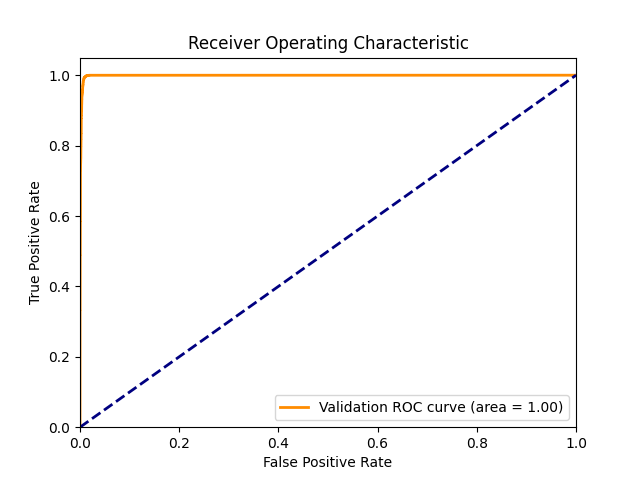

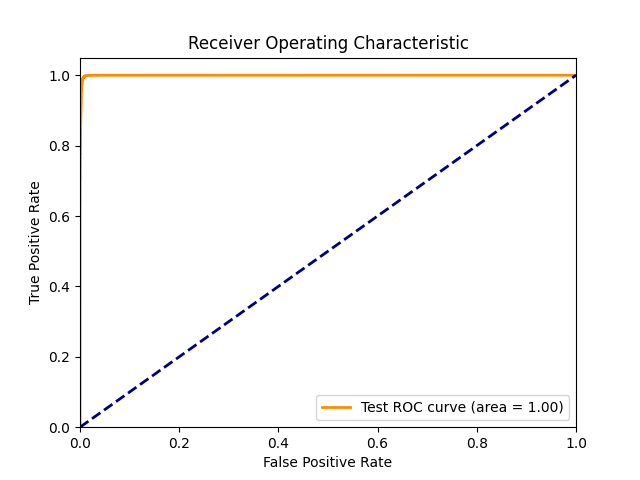

In [43]:
#Loading the Best model
!make load_model
from IPython.display import Image

image_path_2 = 'reports/figures/validation_roc_curve.png'

# Display the Validation ROC Curve Image
display(Image(filename=image_path_2))

image_path_3='reports/figures/test_roc_curve.png'

# Display the Test ROC Curve Image:
display(Image(filename=image_path_3))



In [44]:
#Predicting the model on unseen data
!make predict_model

>>> Predicting on unseen data.
python3 src/models/predict_model.py
Model Successfully Predicted. Please check reports/figures/final_model_outputs_week3_31stAug.csv 
